In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = "/content/drive/MyDrive/ucsd/2022/spring/cse291/COVID19 Sera Data/"

In [ ]:
dataset_df = pd.read_csv(dataset_dir + "covid19_sera_merged.csv")
dataset_df.head()

,maestro_column_unmod,maestro_column_variant,patient_id,label,y_covid,y_severe_type,Patient ID a,Metabolomics ID e,Metabolites,(14 or 15)-methylpalmitate (a17:0 or i17:0),...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,Healthy,1,0,HC1,jkdz1,jkdz1,7439425.0,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,Healthy,1,0,HC10,jkdz10,jkdz10,16636076.0,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,Healthy,1,0,HC12,jkdz12,jkdz12,9140857.0,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,Healthy,1,0,HC13,jkdz13,jkdz13,7863659.5,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,Healthy,1,0,HC17,jkdz17,jkdz17,7996507.5,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


In [ ]:
dataset_df = dataset_df.fillna(0)

## Split train/validation/test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(dataset_df, test_size=0.3, random_state=12345)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=54321)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(58, 203872)
(12, 203872)
(13, 203872)


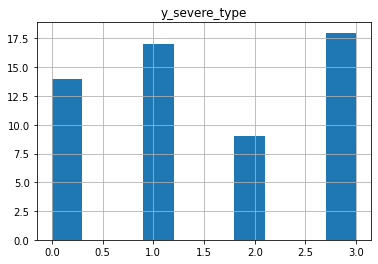

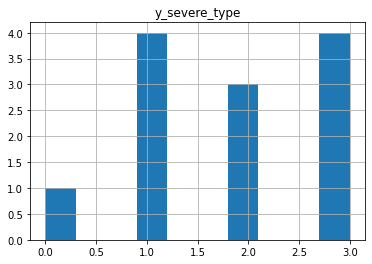

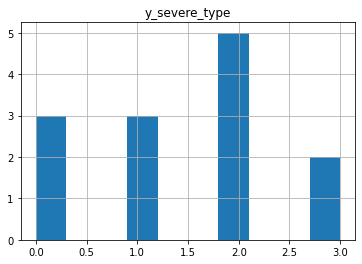

In [ ]:
train_df[["y_severe_type"]].hist()
val_df[["y_severe_type"]].hist()
test_df[["y_severe_type"]].hist()
plt.show()

## Unmod features selection

In [ ]:
def get_unmod_features(df):
  return df.iloc[:, 950:102411]

In [ ]:
unmod_train = get_unmod_features(train_df)
unmod_val = get_unmod_features(val_df)
unmod_test = get_unmod_features(test_df)

In [ ]:
unmod_train.head()

,unmod_ccms_row_1,unmod_ccms_row_2,unmod_ccms_row_3,unmod_ccms_row_4,unmod_ccms_row_5,unmod_ccms_row_6,unmod_ccms_row_7,unmod_ccms_row_8,unmod_ccms_row_9,unmod_ccms_row_10,...,unmod_ccms_row_101452,unmod_ccms_row_101453,unmod_ccms_row_101454,unmod_ccms_row_101455,unmod_ccms_row_101456,unmod_ccms_row_101457,unmod_ccms_row_101458,unmod_ccms_row_101459,unmod_ccms_row_101460,unmod_ccms_row_101461
25,0.0,0.0,0.125162,0.523169,0.118659,0.623897,0.0,0.000000,0.000000,0.000000,...,0.475127,0.475127,0.475127,0.475127,0.475127,0.475127,0.475127,0.475127,0.319976,0.475127
70,0.0,0.0,1.210748,0.000000,0.000000,0.000000,0.0,0.165167,0.165167,0.165167,...,0.498211,0.498211,0.498211,0.498211,0.498211,0.498211,0.498211,0.498211,0.148594,0.498211
28,0.0,0.0,0.757112,0.000000,0.000000,0.000000,0.0,0.273064,0.273064,0.273064,...,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.200612,0.717780
18,0.0,0.0,0.743318,0.000000,0.000000,0.000000,0.0,0.254505,0.254505,0.254505,...,0.650227,0.650227,0.650227,0.650227,0.650227,0.650227,0.650227,0.650227,0.110129,0.650227
9,0.0,0.0,0.030790,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.453239,1.453239,1.453239,1.453239,1.453239,1.453239,1.453239,1.453239,0.487906,1.453239


In [ ]:
unmod_selected = []
threshold = 1.0
ratio_df = (unmod_train.to_numpy() == 0).sum(axis=0)
for i, x in enumerate(ratio_df):
  if x < threshold*unmod_train.shape[0]:
    unmod_selected.append(i)
len(unmod_selected)

101248

## Finding feature importance using Logistic Regression with L1 and Random Forest Classifier (on unmod peptide)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

In [ ]:
# lr_model = LogisticRegression(penalty="l1", solver="liblinear")
# lr_model.fit(unmod_train.iloc[:, unmod_selected], train_df["y_severe_type"])

In [ ]:
# print(accuracy_score(lr_model.predict(unmod_train.iloc[:, unmod_selected]), train_df["y_severe_type"]))
# print(accuracy_score(lr_model.predict(unmod_val.iloc[:, unmod_selected]), val_df["y_severe_type"]))
# print(accuracy_score(lr_model.predict(unmod_test.iloc[:, unmod_selected]), test_df["y_severe_type"]))

In [ ]:
# unmod_selected = []
# for i, x in enumerate(np.sum(lr_model.coef_, axis=0)):
#   if x != 0:
#     unmod_selected.append(i)
# len(unmod_selected)

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=30)
# rf_model.fit(unmod_train.iloc[:, unmod_selected], train_df["y_severe_type"])

rf_model = LGBMClassifier(n_estimators=200)
rf_model.fit(unmod_train.iloc[:, unmod_selected], train_df["y_severe_type"])

print(accuracy_score(rf_model.predict(unmod_train.iloc[:, unmod_selected]), train_df["y_severe_type"]))
print(accuracy_score(rf_model.predict(unmod_val.iloc[:, unmod_selected]), val_df["y_severe_type"]))
print(accuracy_score(rf_model.predict(unmod_test.iloc[:, unmod_selected]), test_df["y_severe_type"]))

1.0
0.8333333333333334
0.6153846153846154


In [ ]:
unmod_selected = []
for i, x in enumerate(rf_model.feature_importances_):
  if x != 0:
    unmod_selected.append(i)
len(unmod_selected)

78

## Finding feature importance using Logistic Regression with L1 and Random Forest Classifier (on variant peptide)

In [ ]:
def get_variant_features(df):
  return df.iloc[:, 102411:]

In [ ]:
variant_train = get_variant_features(train_df)
variant_val = get_variant_features(val_df)
variant_test = get_variant_features(test_df)

In [ ]:
variant_train.head()

,variant_ccms_row_1,variant_ccms_row_2,variant_ccms_row_3,variant_ccms_row_4,variant_ccms_row_5,variant_ccms_row_6,variant_ccms_row_7,variant_ccms_row_8,variant_ccms_row_9,variant_ccms_row_10,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
25,0.0,0.0,0.125162,0.523169,0.118659,0.623897,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.321736,0.0,0.000000,0.000000,0.000000,0.000000,0.524086,0.0
70,0.0,0.0,1.210748,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.181003,...,0.00000,0.307777,0.000000,0.0,0.549982,0.000000,0.000000,0.000000,0.232562,0.0
28,0.0,0.0,0.757112,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.299246,...,0.00000,1.489917,0.000000,0.0,0.789613,0.000000,0.000000,0.000000,0.156169,0.0
18,0.0,0.0,0.743318,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.278907,...,0.00000,1.182886,0.000000,0.0,0.589243,0.000000,0.000000,0.000000,0.163054,0.0
9,0.0,0.0,0.030790,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.52507,0.143092,0.000000,0.0,0.000000,1.488615,1.349938,1.324341,0.000000,0.0


In [ ]:
variant_selected = []
threshold = 1.0
ratio_df = (variant_train.to_numpy() == 0).sum(axis=0)
for i, x in enumerate(ratio_df):
  if x < threshold*variant_train.shape[0]:
    variant_selected.append(i)
len(variant_selected)

100940

In [ ]:
# lr_model = LogisticRegression(penalty="l1", solver="liblinear")
# lr_model.fit(variant_train.iloc[:, variant_selected], train_df["y_severe_type"])

In [ ]:
# print(accuracy_score(lr_model.predict(variant_train.iloc[:, variant_selected]), train_df["y_severe_type"]))
# print(accuracy_score(lr_model.predict(variant_val.iloc[:, variant_selected]), val_df["y_severe_type"]))
# print(accuracy_score(lr_model.predict(variant_test.iloc[:, variant_selected]), test_df["y_severe_type"]))

In [ ]:
# variant_selected = []
# for i, x in enumerate(np.sum(lr_model.coef_, axis=0)):
#   if x != 0:
#     variant_selected.append(i)
# len(variant_selected)

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=30)
# rf_model.fit(variant_train.iloc[:, variant_selected], train_df["y_severe_type"])

rf_model = LGBMClassifier(n_estimators=200)
rf_model.fit(variant_train.iloc[:, variant_selected], train_df["y_severe_type"])

print(accuracy_score(rf_model.predict(variant_train.iloc[:, variant_selected]), train_df["y_severe_type"]))
print(accuracy_score(rf_model.predict(variant_val.iloc[:, variant_selected]), val_df["y_severe_type"]))
print(accuracy_score(rf_model.predict(variant_test.iloc[:, variant_selected]), test_df["y_severe_type"]))

1.0
1.0
0.7692307692307693


In [ ]:
variant_selected = []
for i, x in enumerate(rf_model.feature_importances_):
  if x != 0:
    variant_selected.append(i)
len(variant_selected)

66

## Finding feature importance with Random Forest (on metabolomic data)

In [ ]:
def get_meta_features(df):
  return df.iloc[:, 9:950]

In [ ]:
meta_train = get_meta_features(train_df)
meta_val = get_meta_features(val_df)
meta_test = get_meta_features(test_df)

In [ ]:
meta_train.head()

,(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(2 or 3)-decenoate (10:1n7 or n8),"(2,4 or 2,5)-dimethylphenol sulfate",(R)-3-hydroxybutyrylcarnitine,(S)-3-hydroxybutyrylcarnitine,(S)-a-amino-omega-caprolactam,1-(1-enyl-oleoyl)-GPE (P-18:1)*,1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*,1-(1-enyl-palmitoyl)-2-arachidonoyl-GPE (P-16:0/20:4)*,...,valine,valsartan,valylglycine,vanillactate,vanillic acid glycine,vanillic alcohol sulfate,vanillylmandelate (VMA),xanthine,xanthosine,xanthurenate
25,14176780.0,1.231224e+06,623500.000,0.0000,1.562588e+06,213251.0000,0.000000e+00,2.606015e+05,22206588.0,10955761.0,...,558215424,0.0,286266.2500,53240.0000,0.0000,0.0,185616.2656,10978099.0,0.0000,138476.5781
70,8905790.0,9.645103e+05,3359165.750,0.0000,0.000000e+00,0.0000,1.035049e+06,9.447748e+05,50521448.0,0.0,...,678859392,0.0,248050.1094,81752.6328,0.0000,0.0,201078.2656,43347372.0,166201.9375,0.0000
28,8759014.0,1.024313e+06,350098.875,90617.0000,0.000000e+00,192375.1250,1.000798e+06,0.000000e+00,16333119.0,8128851.5,...,463664544,0.0,260476.9688,42393.3555,88918.5156,0.0,155431.1250,11145432.0,0.0000,0.0000
18,12287208.0,1.516480e+06,1165411.750,27345.4199,0.000000e+00,685162.1875,0.000000e+00,2.336276e+06,37113956.0,18988858.0,...,542268096,0.0,383362.7188,0.0000,35317.8672,0.0,118960.4453,27888098.0,0.0000,0.0000
9,9796969.0,1.019916e+06,0.000,86051.6484,2.134169e+05,189071.4063,7.857872e+05,1.384170e+06,32048208.0,20300660.0,...,695492800,0.0,376211.1250,44411.6484,27215.4961,0.0,207670.0469,13685490.0,0.0000,0.0000


In [ ]:
meta_selected = []
threshold = 1.0
ratio_df = (meta_train.to_numpy() == 0).sum(axis=0)
for i, x in enumerate(ratio_df):
  if x < threshold*meta_train.shape[0]:
    meta_selected.append(i)
len(meta_selected)

935

In [ ]:
# lr_model = LogisticRegression(penalty="l1", solver="liblinear")
# lr_model.fit(meta_train.iloc[:, meta_selected], train_df["y_severe_type"])

In [ ]:
# print(accuracy_score(lr_model.predict(meta_train.iloc[:, meta_selected]), train_df["y_severe_type"]))
# print(accuracy_score(lr_model.predict(meta_val.iloc[:, meta_selected]), val_df["y_severe_type"]))
# print(accuracy_score(lr_model.predict(meta_test.iloc[:, meta_selected]), test_df["y_severe_type"]))

In [ ]:
# meta_selected = []
# for i, x in enumerate(np.sum(lr_model.coef_, axis=0)):
#   if x != 0:
#     meta_selected.append(i)
# len(meta_selected)

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=30)
# rf_model.fit(meta_train.iloc[:, meta_selected], train_df["y_severe_type"])

rf_model = LGBMClassifier(n_estimators=200)
rf_model.fit(meta_train.iloc[:, meta_selected], train_df["y_severe_type"])

print(accuracy_score(rf_model.predict(meta_train.iloc[:, meta_selected]), train_df["y_severe_type"]))
print(accuracy_score(rf_model.predict(meta_val.iloc[:, meta_selected]), val_df["y_severe_type"]))
print(accuracy_score(rf_model.predict(meta_test.iloc[:, meta_selected]), test_df["y_severe_type"]))

1.0
0.6666666666666666
0.8461538461538461


In [ ]:
meta_selected = []
for i, x in enumerate(rf_model.feature_importances_):
  if x != 0:
    meta_selected.append(i)
len(meta_selected)

75

## Just try to combine everything together

In [ ]:
!pip install lightgbm

In [ ]:
selected = []
for x in unmod_selected:
  selected.append(x + 950)
for x in variant_selected:
  selected.append(x + 102411)
for x in meta_selected:
  selected.append(x + 9)
model = LGBMClassifier(n_estimators=200)
model.fit(train_df.iloc[:, selected], train_df["y_severe_type"])

LGBMClassifier(n_estimators=200)

In [ ]:
print(accuracy_score(model.predict(train_df.iloc[:, selected]), train_df["y_severe_type"]))
print(accuracy_score(model.predict(val_df.iloc[:, selected]), val_df["y_severe_type"]))
print(accuracy_score(model.predict(test_df.iloc[:, selected]), test_df["y_severe_type"]))

1.0
0.75
0.8461538461538461


In [ ]:
len(selected)

219

In [ ]:
ref_model = LGBMClassifier(n_estimators=200)
ref_model.fit(train_df.iloc[:, 9:], train_df["y_severe_type"])

print(accuracy_score(ref_model.predict(train_df.iloc[:, 9:]), train_df["y_severe_type"]))
print(accuracy_score(ref_model.predict(val_df.iloc[:, 9:]), val_df["y_severe_type"]))
print(accuracy_score(ref_model.predict(test_df.iloc[:, 9:]), test_df["y_severe_type"]))

1.0
0.8333333333333334
0.8461538461538461


In [ ]:
sum(ref_model.feature_importances_ != 0)

84

In [ ]:
for i, x in enumerate(ref_model.feature_importances_):
  if x != 0:
    print(i + 9, train_df.columns[i + 9])

14 (S)-3-hydroxybutyrylcarnitine
17 1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*
64 1-linoleoyl-GPA (18:2)*
81 1-oleoyl-2-linoleoyl-GPC (18:1/18:2)*
115 1-stearoyl-2-docosahexaenoyl-GPE (18:0/22:6)*
143 2'-deoxyuridine
172 2'-O-methyluridine
195 3b-hydroxy-5-cholenoic acid
207 3-hydroxydecanoate
212 3-hydroxylaurate
224 3-methyl catechol sulfate (1)
235 3-sulfo-L-alanine
256 4-methoxyphenol sulfate
284 5-HETE
289 5-methylthioadenosine (MTA)
293 6-bromotryptophan
318 alpha-hydroxyisocaproate
319 alpha-hydroxyisovalerate
321 alpha-ketoglutarate
322 alpha-tocopherol
349 benzoate
350 beta-alanine
353 beta-hydroxyisovalerate
367 biliverdin
372 butyrate/isobutyrate (4:0)
386 catechol sulfate
411 creatine
418 cysteine-glutathione disulfide
497 gamma-glutamyl-epsilon-lysine
517 glucose
518 glucuronate
544 glycochenodeoxycholate glucuronide (1)
553 glycoursodeoxycholic acid sulfate (1)
569 hexanoylglutamine
570 hexanoylglycine (C6)
573 histidine betaine (hercynine)*
637 maltose
640 ma

In [ ]:
ref_model2 = LGBMClassifier(n_estimators=200)
ref_model2.fit(train_df.iloc[:, 950:], train_df["y_severe_type"])

print(accuracy_score(ref_model2.predict(train_df.iloc[:, 950:]), train_df["y_severe_type"]))
print(accuracy_score(ref_model2.predict(val_df.iloc[:, 950:]), val_df["y_severe_type"]))
print(accuracy_score(ref_model2.predict(test_df.iloc[:, 950:]), test_df["y_severe_type"]))

1.0
0.8333333333333334
0.7692307692307693


In [ ]:
sum(ref_model2.feature_importances_ != 0)

76

In [ ]:
fi_idxs = list(range(len(ref_model2.feature_importances_)))
fis = list(ref_model2.feature_importances_)
fi_idxs.sort(key=lambda i: fis[i], reverse=True)
fi_idxs[:10]

[172961, 158824, 12386, 198216, 197748, 174977, 176262, 98454, 121973, 19270]

In [ ]:
172961 - 101461

71500

In [ ]:
prot_idxs = set()
for i, x in enumerate(ref_model2.feature_importances_):
  if x != 0:
    if i >= 101461:
      prot_idxs.add(i - 101461)
    else:
      prot_idxs.add(i)
    print(i + 950, train_df.columns[i + 950], i, i - 101461)
prot_idxs = sorted(prot_idxs)

5350 unmod_ccms_row_4401 4400 -97061
6557 unmod_ccms_row_5608 5607 -95854
7668 unmod_ccms_row_6719 6718 -94743
13336 unmod_ccms_row_12387 12386 -89075
20220 unmod_ccms_row_19271 19270 -82191
20569 unmod_ccms_row_19620 19619 -81842
34857 unmod_ccms_row_33908 33907 -67554
40673 unmod_ccms_row_39724 39723 -61738
45528 unmod_ccms_row_44579 44578 -56883
52855 unmod_ccms_row_51906 51905 -49556
57335 unmod_ccms_row_56386 56385 -45076
78925 unmod_ccms_row_77976 77975 -23486
92529 unmod_ccms_row_91580 91579 -9882
99404 unmod_ccms_row_98455 98454 -3007
104124 variant_ccms_row_1714 103174 1713
105446 variant_ccms_row_3036 104496 3035
107946 variant_ccms_row_5536 106996 5535
109721 variant_ccms_row_7311 108771 7310
114642 variant_ccms_row_12232 113692 12231
118027 variant_ccms_row_15617 117077 15616
118393 variant_ccms_row_15983 117443 15982
120346 variant_ccms_row_17936 119396 17935
121819 variant_ccms_row_19409 120869 19408
122923 variant_ccms_row_20513 121973 20512
127004 variant_ccms_row_24594

In [ ]:
prot_df = pd.read_csv(dataset_dir + "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv", sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (259) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
prot_df.iloc[prot_idxs, :8]

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge
1713,1714,1714,.MODA.,specs_ms.mgf,1095390,"K.[304.207](K,176.118)SASDLTWDNL(K,304.207).G",.KSASDLTWDNLK.,2
3035,3036,3036,.MODA.,specs_ms.mgf,927303,"R.{290.173}[304.207]EGT(C,57.021)PEAPTDE(C,57....",.EGTCPEAPTDECKPVK.,4
4400,4401,4401,.MODA.,specs_ms.mgf,539609,"K.{89.979}[304.207]QSFDLSV(K,304.207).A",.QSFDLSVK.,3
5535,5536,5536,.MODA.,specs_ms.mgf,1012798,"K.[304.207]ADSVVDLLSYNV(Q,303.212)GSGETTYDH(K,...",.ADSVVDLLSYNVQGSGETTYDHK.,4
5607,5608,5608,.MSGFPLUS.,specs_ms.mgf,998701,"K.[304.207]LLLQ(M,15.995)DSSATAYGSTVS(K,304.20...",.LLLQMDSSATAYGSTVSK.,3
...,...,...,...,...,...,...,...,...
91579,91580,91580,.MSGFPLUS.,specs_ms.mgf,949573,"R.[304.207]DETLQDG(C,57.021)DTHF(C,57.021)(K,3...",.DETLQDGCDTHFCK.,3
96287,96288,96288,.MODA.,specs_ms.mgf,967464,"K.[304.207]LVD(K,304.207)FLED(V,272.169)(K,304...",.LVDKFLEDVK.,3
96755,96756,96756,.MODA.,specs_ms.mgf,815174,"R.[304.207](Q,-48.618)(K,304.207)LHELQE(K,304....",.QKLHELQEK.,3
97858,97859,97859,.MODA.,specs_ms.mgf,706464,"K.[304.207]LLDNWDS(V,-36.013).T",.LLDNWDSV.,2


In [ ]:
prot_df.columns[-10:]

Index(['PSP_site_match', 'DrugBank_drugs', 'Parent_mass',
       'Num_PSP_Drugbank_events', 'Start_AA_1_based', 'End_AA_1_based',
       'Num_spectra_for_cluster', 'Num_spectra_for_unmodified_sequence',
       'Num_spectra_for_peptide_variant', 'Internal_ref_orig_intensity'],
      dtype='object')

In [ ]:
prot_df.iloc[prot_idxs, :8].to_csv(dataset_dir + "selected_peptides.tsv", sep="\t")

In [ ]:
prot_df.columns[:20]

Index(['rowid', 'ccms_row_id', 'Algorithm', 'Filename', 'Cluster_index',
       'Peptide', 'Unmodified_sequence', 'Charge',
       '_dyn_#Intensity_for_cluster',
       '_dyn_#Intensity_for_unmodified_sequence',
       'Num_G1_spectra_for_unmodified_sequence',
       'Num_G2_spectra_for_unmodified_sequence',
       'Num_G3_spectra_for_unmodified_sequence',
       'Num_G4_spectra_for_unmodified_sequence',
       'Num_G5_spectra_for_unmodified_sequence',
       'Num_G6_spectra_for_unmodified_sequence',
       '_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_unmodified_sequence',
       '_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_unmodified_sequence',
       '_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_unmodified_sequence',
       '_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_unmodified_sequence'],
      dtype='object')

In [ ]:
prot_df.columns[-50:]

Index(['Outlier_default_group_for_unmodified_sequence',
       'Outlier_default_group_ratio_for_unmodified_sequence',
       'Outlier_default_group_for_peptide_variant',
       'Outlier_default_group_ratio_for_peptide_variant',
       'Outlier_user_group_for_unmodified_sequence',
       'Outlier_user_group_ratio_for_unmodified_sequence',
       'Outlier_user_group_for_peptide_variant',
       'Outlier_user_group_ratio_for_peptide_variant', 'Spectral_network',
       'All_spectral_networks', 'Original_filepath',
       'Num_network_neighbors_for_unmodified_sequence',
       'Num_network_neighbors_for_peptide_variant',
       'Sum_of_peptide_mass_offsets', 'All_peptide_mods',
       'Num_G1_spectra_for_cluster', 'Num_G2_spectra_for_cluster',
       'Num_G3_spectra_for_cluster', 'Num_G4_spectra_for_cluster',
       'Num_G5_spectra_for_cluster', 'Num_G6_spectra_for_cluster', 'Start_AA',
       'End_AA', 'Peptide_variant_group', 'Protein_region_indices',
       'Protein_region', 'Num_peptid